<H1> Regression </H1>

This programming assigmnent is on the topics of regression. This assignment was developed for the PRML course of diwali semester 2020 at IIT Dharwad.

Course Advisor: Prof. S.R.M. Prasanna

Course TA's:
1. Jagabandhu Mishra
2. Seema K.

Solution and modifications by : [S U Swakath](https://github.com/swakath)





Regression:

Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following.

1) Fitting of line (one variable learning)

2) Fitting of line (two variable learning)

3) Fitting of a plane (two variable)

4) Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

5) Polynomial regression

6) Pratical example of regression task (salary prediction)

# 1) Fitting of line

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=10$ and $w_{1}=1$ and generate y

iii) Plot (x,y)



In [1]:
import numpy as np
from matplotlib import pyplot as plt

NumPy: A powerful Python library for numerical operations, providing support for arrays, matrices, and mathematical functions.

Matplotlib: A popular plotting library that helps visualize data in 2D graphs, providing a wide range of plotting options for creating figures, plots, histograms, and more.

These libraries are very easy to use. I suggest that you can directy proceed with the below code. If you feel that the syntax is complicated please check Geeks for Geeks or other online resources regarding these libraries.

Code and understand the syntax, don't read them like theory.

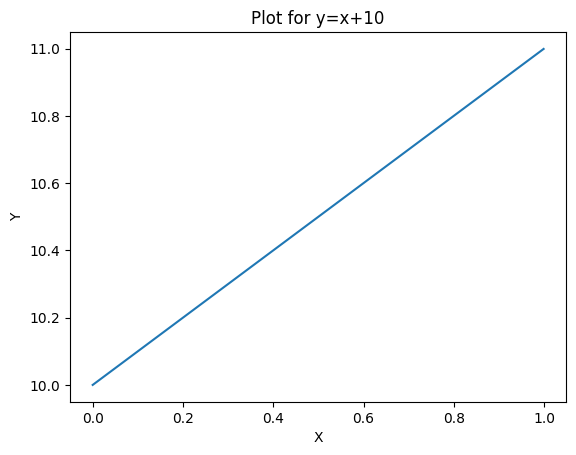

In [2]:
# Generating samples for independent variable
x = np.arange(0,1,0.001)

# Generating the line
y = x + 10

# Plotting the line
plt.plot(x,y);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot for y=x+10")
plt.show()

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

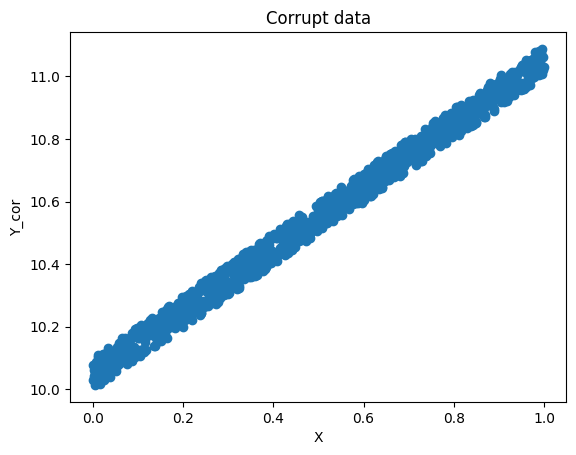

In [3]:
# Generating bias data sample for corruption
cor = np.random.rand(1000)

# Corrupting the data using the random data generated
y_cor = np.add(y,0.1*cor)

# Plotting the corrupted data
plt.scatter(x,y_cor)
plt.xlabel("X")
plt.ylabel("Y_cor")
plt.title("Corrupt data")
plt.show()

c)  Curve prediction using hurestic way.

i) Keep $w_{0}=10$ as constant and find $w_{1}$ ?

ii) Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that.

iii) Find $y_{pred}$ using each value of $w_{1}$.

iv) The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$.

$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{cor_{i}}-y_{pred_{i}})^2$$

v) Plot error vs srch_$w1$

vi) First plot the scatter plot (x,$y_{cor}$) , over that plot (x,$y_{bestpred}$).

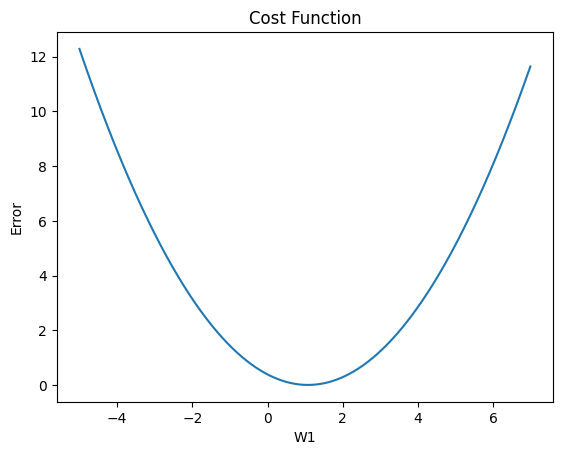

In [4]:
# Generating different w1 samples
w1 = np.arange(-5,7,0.012)

# Computing Mean Square Error for each w1 sample
error = []
temp1 = []
y_pred = []
for i in w1:
    y_pred = i*x+10
    mean_error = np.mean(np.square(y_cor - y_pred))
    error.append(mean_error)

# Plotting the Error vs Weights Curve
plt.plot(w1,error)
plt.xlabel("W1")
plt.ylabel("Error")
plt.title("Cost Function")
plt.show()

1.0719999999997807


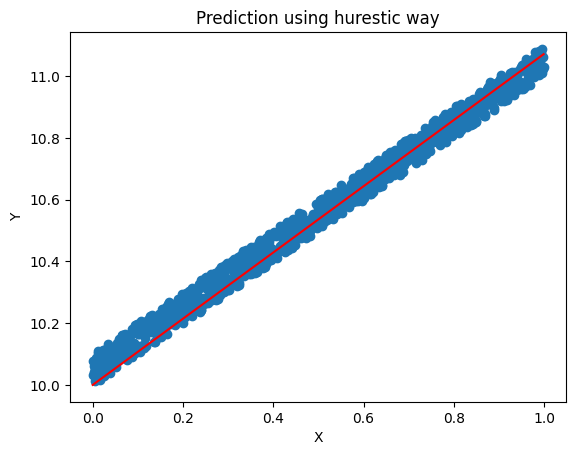

In [5]:
# Finding the index for minimum cost w1
minIndx = np.argmin(error)

# Computing the best predicted y
y_bestpred= w1[minIndx] * x + 10

print(w1[minIndx])

# Plotting the augmented data and predicted y
plt.scatter(x,y_cor)
plt.plot(x,y_bestpred,color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Prediction using hurestic way")
plt.show()

d) Gradient descent

i) $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-(w_{0}+w_{1}x_{i}))^2$

ii) $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

iii) $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

In [6]:
def OneVarCstFun(w1, x, c, y_cor):
  y = w1*x + c
  mse = np.mean(np.square(y - y_cor))
  return mse;

1.0676004609745715


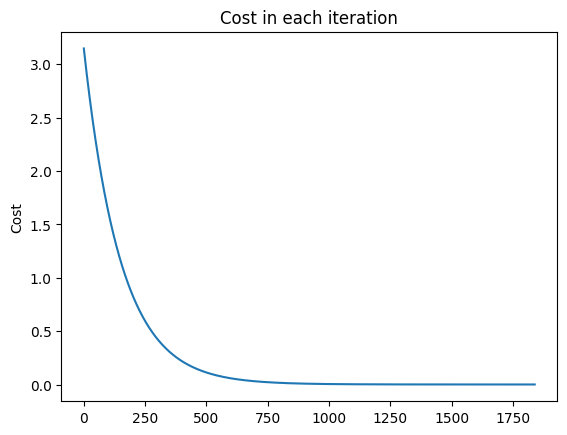

In [7]:
## One dimentional linear Regression
# Linear function constant
c = 10
# W1 weight sample
w1 = -2
# Learning Rate
lr = 0.01
# Convergence Threshold
convg = 0.0000001
# W1 sample index
i = 0

# Sample data and Cost value for plotting
w1_samples =[]
cost_values = []

w1_samples.append(w1)
cost = OneVarCstFun(w1, x, 10, y_cor)
cost_values.append(cost)

# Running gradient decent
while(1):
    # Computing y value for current w1 sample
    y_samples = w1*x + 10
    y_diff = y_samples - y_cor

    # Computing the gradient
    grad_samples = np.multiply(y_diff,x)
    cur_gradient = np.mean(grad_samples)

    # Updating the W1 value based on gardient and learning rate
    w1_update = cur_gradient*lr
    w1 = w1 - w1_update;
    w1_samples.append(w1)

    # Computing the cost for the new W1
    current_cost = OneVarCstFun(w1, x, 10, y_cor)
    cost_values.append(current_cost)

    # Checking for convergence to break the loop
    if (cost_values[i]-current_cost <= convg):
        break
    i+=1

w1_gradient_result = w1
#Printing the final W1 and Cost plot
print(w1_gradient_result)
plt.plot(cost_values)
plt.title("Cost in each iteration")
plt.ylabel("Cost")
plt.show()

1.0676004609745715


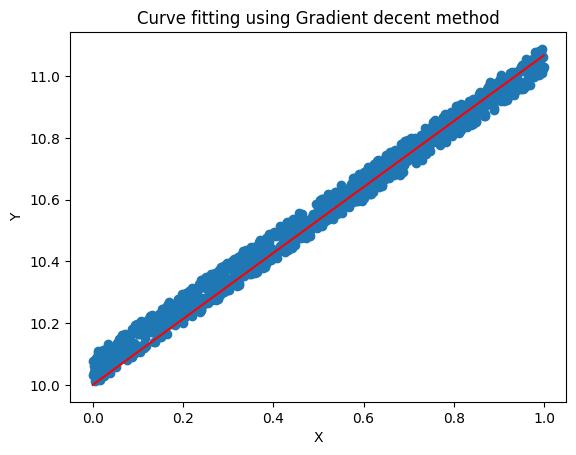

In [8]:
# Plotting the predicted curve over the data
print(w1_gradient_result)
y_bestgrad = w1_gradient_result*x+c;
plt.scatter(x,y_cor)
plt.plot(x,y_bestgrad, color ='red')
plt.xlabel('X');
plt.ylabel('Y');
plt.title("Curve fitting using Gradient decent method")
plt.show()

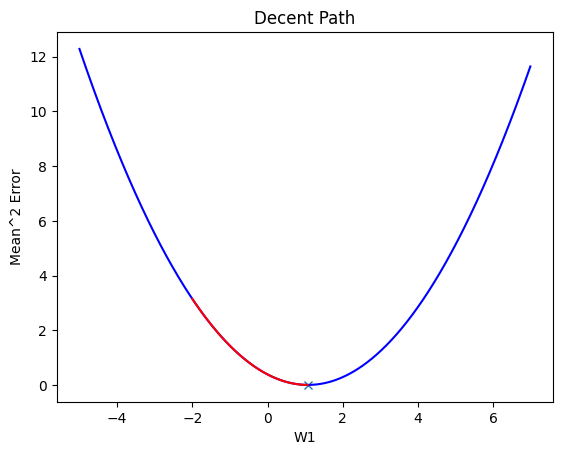

In [10]:
# Plotting the gradient decent path

w1_plot_samples = np.arange(-5,7,0.012)
arg = np.argmin(error)
plt.plot(w1_plot_samples[arg], error[arg],marker="x")
plt.plot(w1_plot_samples,error,color='blue')
plt.plot(w1_samples,cost_values,color='red')
plt.title("Decent Path")
plt.xlabel("W1")
plt.ylabel("Mean^2 Error")
plt.show()

# 2) Fitting line with two unknown variables

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=5$ and $w_{1}=1.5$ and generate y

iii) Plot (x,y)

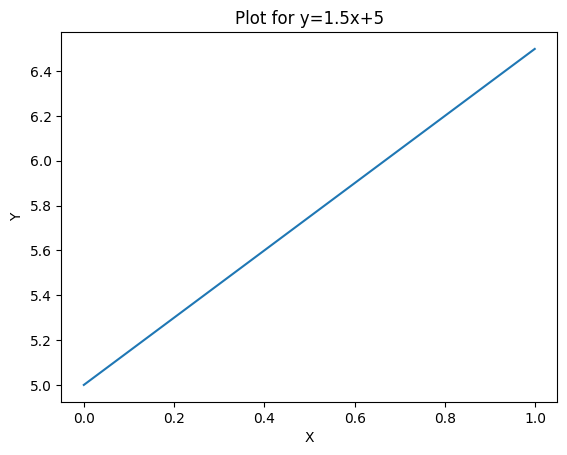

In [11]:
# Generating independent variable
x2 = np.arange(0,1,0.001)

# Computing Line y = 1.5x + 5
y2 = 1.5*x2 + 5

# Plotting line
plt.plot(x2,y2);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot for y=1.5x+5")
plt.show()

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

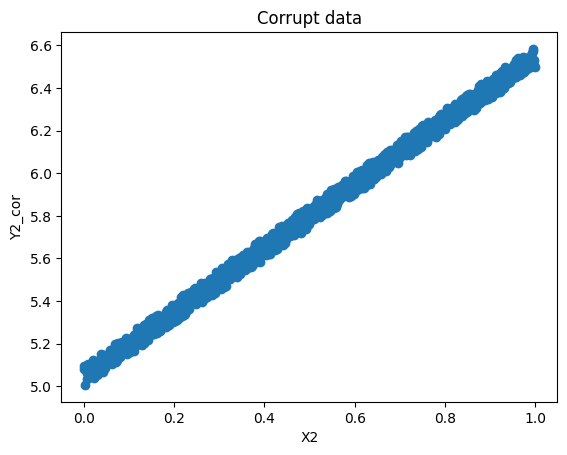

In [12]:
# Corrupting the line data for augmented data set
cor = np.random.rand(1000)
y2_cor = np.add(y2,0.1*cor)

# Plotting the corrupted data set
plt.scatter(x2,y2_cor)
plt.xlabel("X2")
plt.ylabel("Y2_cor")
plt.title("Corrupt data")
plt.show()

c) Plot the error surface

we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)

i) take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface.

In [13]:
from mpl_toolkits import mplot3d

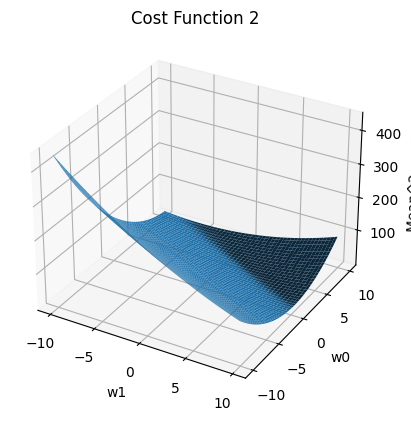

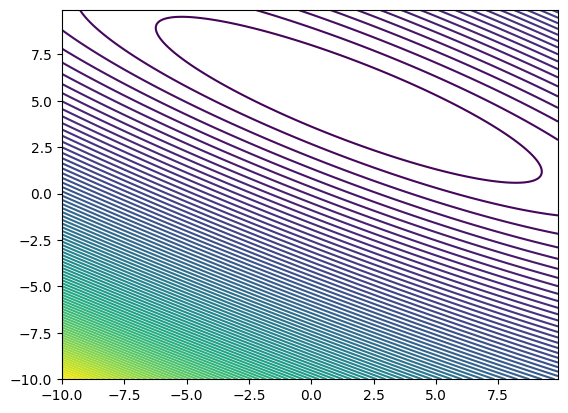

In [15]:
w1 = np.arange(-10,10,0.1)
w0 = np.arange(-10,10,0.1)
y2_pred = []
error2 = []
list = []
for i in w1:
  for j in w0:
     y2_pred = i*x+j
     mse = np.mean(np.square(y2_cor - y2_pred))
     error2.append(mse)

error2 = np.array(error2).reshape(len(w1), len(w0))
Y,X = np.meshgrid(w1,w0)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,error2)
ax.set_title('Cost Function 2');
ax.set_xlabel('w1')
ax.set_ylabel('w0')
ax.set_zlabel('Mean^2 error');
plt.show()
plt.contour(X,Y,error2,100)
plt.show()

d) Gradient descent:

In [17]:
# Gradient descent
# initialization
def TwoVarCstFun(w0_fun, w1_fun):
  temp1 = w0_fun * x + w1_fun
  mse = np.mean(np.square(y2_cor - temp1))
  return mse

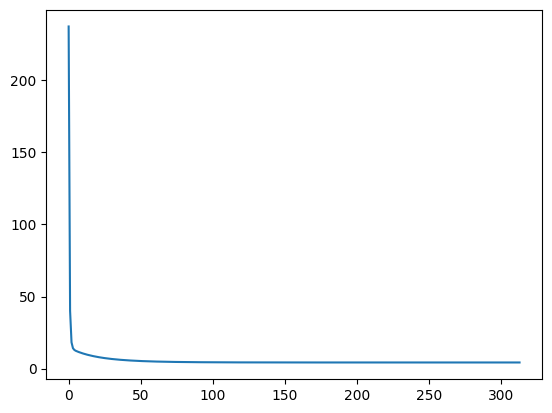

1.5023478588792156 5.0479211038825635


In [22]:
# Initialize parameters
w1 = -7
w0 = -5
lr = 0.6  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001

# Lists to track parameter updates and cost function values
w0_All = [w0]
w1_All = [w1]
CstFun_Two = [TwoVarCstFun(w0, w1)]

# Initialize iteration counter
i = 0

# Gradient Descent loop to optimize parameters
while True:
    # Calculate predicted values and differences between predictions and actual values
    predicted_values = w1 * x2 + w0
    error_difference = predicted_values - y2_cor

    # Update w1 and w0 based on gradient descent and learning rate
    w1 -= (np.sum(error_difference * x2) / len(x2)) * lr
    w1_All.append(w1)

    w0 -= (np.sum(error_difference) / len(x2)) * lr
    w0_All.append(w0)

    # Calculate the current cost function value and check for convergence
    val = TwoVarCstFun(w0, w1)
    if abs(CstFun_Two[i] - val) <= eps:
        i += 1
        CstFun_Two.append(val)
        break

    i += 1
    CstFun_Two.append(val)

# Plot the convergence of the cost function
plt.plot(CstFun_Two)
plt.show()

# Get the optimized parameters
w1_best = w1
w0_best = w0
print(w1_best,w0_best)

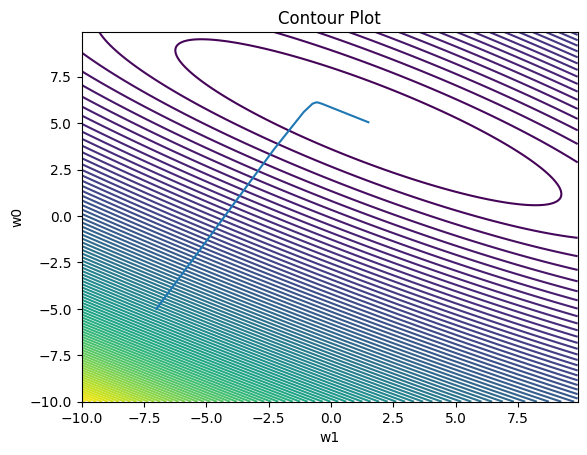

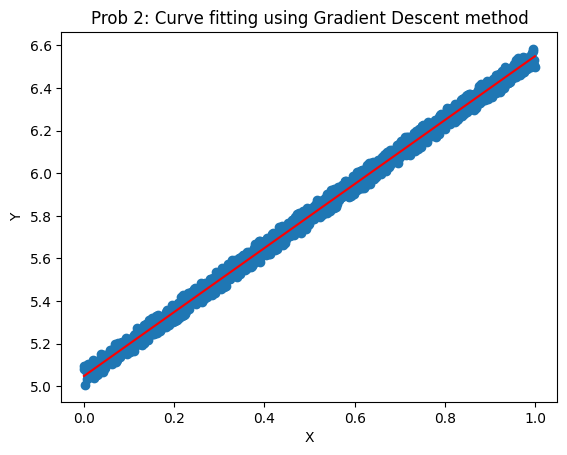

In [24]:
# Store the best predicted values based on the optimized parameters
ye_best =[]  # Placeholder for best predicted values
y2_best = w1_best * x2 + w0_best  # Calculate best predicted values based on optimized w1_best and w0_best

# Generate a range of values for w1 and w0
w1 = np.arange(-10, 10, 0.1)
w0 = np.arange(-10, 10, 0.1)

# Create a mesh grid for contour plotting
Y, X = np.meshgrid(w1, w0)  # Create 2D grid for w0 and w1 values
plt.contour(X, Y, error2, 100)  # Create contour plot using error2 values
plt.plot(w1_All, w0_All)  # Plot the path of w1 and w0 during optimization
plt.title("Contour Plot")  # Set title for the plot
plt.xlabel("w1")  # Label for x-axis
plt.ylabel("w0")  # Label for y-axis
plt.show()  # Display the plot

# Plotting the original data and the best-fit curve
plt.title("Prob 2: Curve fitting using Gradient Descent method")  # Set title for the plot
plt.xlabel("X")  # Label for x-axis
plt.ylabel("Y")  # Label for y-axis
plt.scatter(x2, y2_cor)  # Scatter plot of original data points
plt.plot(x2, y2_best, color='red')  # Plot the best-fit curve in red color


#  3. Fitting of a plane (two variables)

Here, we will try to fit plane using multiveriate regression

i) Generate x1 and x2 from range -1 to 1, (30 samples)

ii) Equation of plane $y=w0+w1x1+w2x2$

iii) Here we will fix w0 and will learn w1 and w2

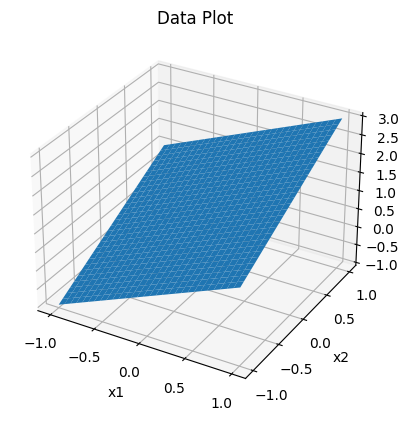

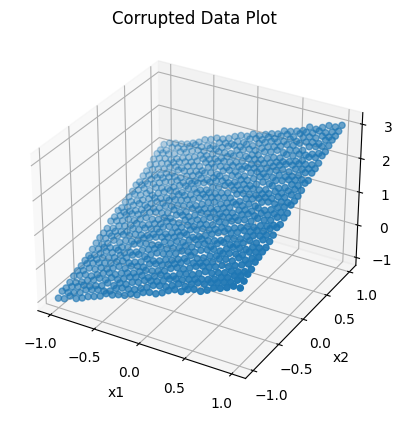

In [26]:
# Generate sample points for x1 and x2 within the range of -1 to 1
x1 = np.linspace(-1, 1, 30)
x2 = np.linspace(-1, 1, 30)

# Create a meshgrid of sample_x1 and sample_x2 for plotting purposes
sample_x1, sample_x2 = np.meshgrid(x1, x2)

# Initialize weights for the linear equation
w0 = w1 = w2 = 1  # Initialize weights w0, w1, and w2

# Generate y3 values based on the linear equation y3 = w0 + w1*sample_x1 + w2*sample_x2
y3 = w0 + w1 * sample_x1 + w2 * sample_x2

# Plot the 3D surface plot of the generated data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(sample_x1, sample_x2, y3)
ax.set_title('Data Plot')  # Set the title of the plot
ax.set_xlabel('x1')  # Label for x-axis
ax.set_ylabel('x2')  # Label for y-axis
plt.show()  # Display the plot

# Create random noise to corrupt the generated data
cor = np.random.rand(30, 30)
y3_cor = y3 + 0.1 * cor  # Introduce 10% random noise to y3

# Plot the 3D scatter plot of the corrupted data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(sample_x1, sample_x2, y3_cor)
ax.set_title('Corrupted Data Plot')  # Set the title of the plot
ax.set_xlabel('x1')  # Label for x-axis
ax.set_ylabel('x2')  # Label for y-axis
plt.show()  # Display the plot

b) Generate Error surface

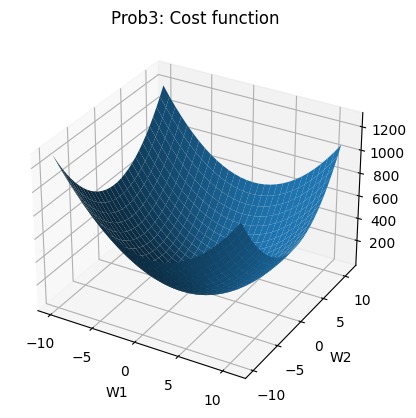

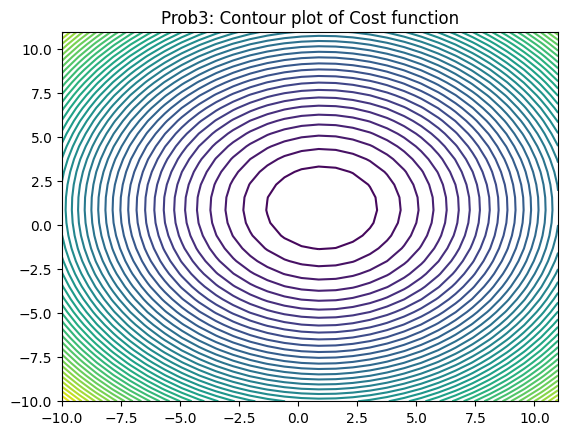

In [27]:
# Generate values for w1 and w2
w1 = np.linspace(-10, 11, 30)
w2 = np.linspace(-10, 11, 30)

# Create meshgrid for w1 and w2
W1, W2 = np.meshgrid(w1, w2)

# Initialize lists and arrays
y3_pred = np.zeros_like(W1)
error3_list = []

for i, w1_val in enumerate(w1):
    error_w2 = []
    for j, w2_val in enumerate(w2):
        # Calculate predicted values based on w0, w1, and w2
        y3_pred = w0 + w1_val * sample_x1 + w2_val * sample_x2

        # Calculate error between predicted and corrupted y3 values
        error_temp = y3_pred - y3_cor
        squared_error = np.multiply(error_temp, error_temp)
        mean_squared_error = np.sum(squared_error) / (2 * len(x1))
        error_w2.append(mean_squared_error)
    error3_list.append(error_w2)

# Convert error3_list to a NumPy array
error3 = np.array(error3_list)

# Plotting the surface plot of the cost function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, error3)
ax.set_title('Prob3: Cost function')
ax.set_xlabel('W1')
ax.set_ylabel('W2')
plt.show()

# Plotting the contour plot of the cost function
plt.contour(W1, W2, error3, 50)
plt.title('Prob3: Contour plot of Cost function')
plt.show()

lc) Gradient descent:

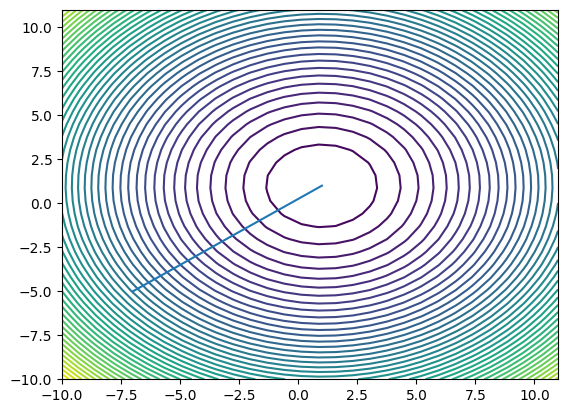

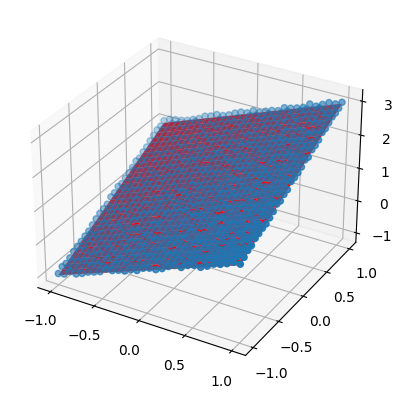

In [28]:
# Gradient descent
init_w1 = -5  # Initial value for w1
init_w2 = -7  # Initial value for w2
lr = 0.1  # Learning rate
eps = 0.000001  # Threshold for convergence

# Lists to track parameter updates
new_w1 = []
new_w2 = []

cur_w1 = init_w1  # Current value for w1
cur_w2 = init_w2  # Current value for w2
pre_w1 = 1000  # Placeholder for the previous value of w1
pre_w2 = 1000  # Placeholder for the previous value of w2

# Slopes on the surface
def dbyw1(w0, w1, w2):
    res = 0
    for i in range(30):
        for j in range(30):
            res += (w1 * x1[i] + w2 * x2[j] + w0 - y3_cor[i][j]) * x1[i] / (30 * 30)
    return res

def dbyw2(w0, w1, w2):
    res = 0
    for i in range(30):
        for j in range(30):
            res += (w1 * x1[i] + w2 * x2[j] + w0 - y3_cor[i][j]) * x2[j] / (30 * 30)
    return res

# Gradient descent loop
while (abs(cur_w1 - pre_w1) > eps) and (abs(cur_w2 - pre_w2) > eps):
    pre_w1, pre_w2 = cur_w1, cur_w2
    new_w1.append(pre_w1)
    new_w2.append(pre_w2)

    tw1 = cur_w1
    tw2 = cur_w2
    cur_w1 = tw1 - lr * dbyw1(w0, tw1, tw2)
    cur_w2 = tw2 - lr * dbyw2(w0, tw1, tw2)

# Plotting contour plot of the cost function and parameter updates
plt.contour(W1, W2, error3, 50)
plt.plot(new_w2, new_w1)
plt.show()

# Generating the best-fit curve based on optimized parameters
y3_best = w0 + sample_x1 * pre_w1 + sample_x2 * pre_w2

# Plotting the best-fit curve along with the corrupted data in 3D space
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(sample_x1, sample_x2, y3_best, color='red')
ax.scatter(sample_x1, sample_x2, y3_cor)
plt.show()

In [31]:
#Same plot as above but using a intractive 3D plotter library
import plotly.graph_objects as go

# Create a 3D scatter plot
fig = go.Figure(data=[
    go.Surface(x=sample_x1, y=sample_x2, z=y3_best, colorscale='Reds', opacity=0.7),
    go.Scatter3d(x=sample_x1.flatten(), y=sample_x2.flatten(), z=y3_cor.flatten(), mode='markers', marker=dict(size=4))
])

# Update layout options for the 3D plot
fig.update_layout(scene=dict(
                    xaxis_title='Sample X1',
                    yaxis_title='Sample X2',
                    zaxis_title='Y3'),
                    width=800, height=800)

fig.show()

# 4. Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector.

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

In [44]:
# Following code is to mount your google drive with this Colab page
# You can access/save files from/to your google drive using this feature
# Upload the salary_pred_data1.csv file to your GDrive.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


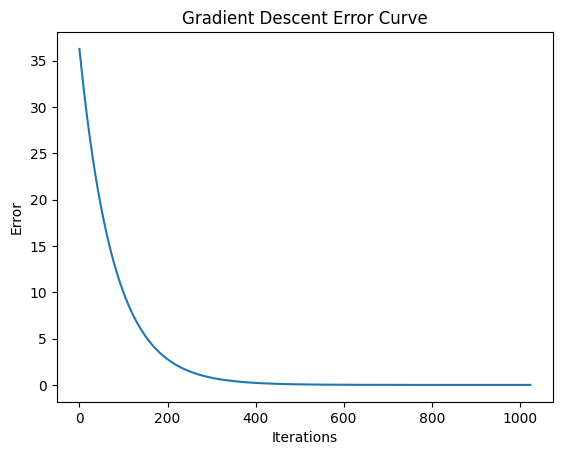

In [45]:
import numpy as np
import matplotlib.pyplot as plt

class Regression:
    def __init__(self, name='reg'):
        self.name = name  # Constructor to initialize instance variable 'name'

    # Gradient descent function to update weights
    def grad_update(self, w_old, lr, y, x):
        w = w_old + (2 * lr) * (x @ (y - (x.T @ w_old))) / y.shape[0]
        return w

    # Function to calculate error
    def error(self, w, y, x):
        return (np.sum(np.square((y - (x.T @ w))))) / y.shape[0]

    # Matrix inversion method for regression
    def mat_inv(self, y, x_aug):
        return (np.linalg.pinv(x_aug @ x_aug.T)) @ (x_aug @ y)

    # Gradient descent regression method
    def Regression_grad_des(self, x, y, lr):
        eps = 0.000001
        w_old = np.random.rand(x.shape[0], 1)
        error1 = 100001.
        error2 = 100000.
        err = []

        # Gradient descent loop
        while (error1 - error2) > eps:
            error1 = self.error(w_old, y, x)
            w_old = self.grad_update(w_old, lr, y, x)
            error2 = self.error(w_old, y, x)
            err.append(error1)

        w_pred = w_old
        return w_pred, err

# Data generation
sim_dim = 5
sim_no_data = 1000
x = np.random.uniform(-1, 1, (sim_dim, sim_no_data))
w = np.array([[1], [2], [3], [5], [9], [3]])  # W=[w0,w1,.....,wM]'
x_aug = np.concatenate((np.ones((1, x.shape[1])), x), axis=0)
y = x_aug.T @ w

# Adding noise to data
nois = np.random.uniform(0, 1, y.shape)
y = y + 0.1 * nois

# Regression computations
reg = Regression()
w_opt = reg.mat_inv(y, x_aug)  # Computing optimal weights using matrix inversion
lr = 0.01
w_pred, err = reg.Regression_grad_des(x_aug, y, lr)  # Gradient descent to find weights

# Plotting the error curve during gradient descent
plt.plot(err)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Gradient Descent Error Curve')
plt.show()

# 5. Polynomial regression:

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. fit the generated curve using different polynomial order. (Using matrix inversion, and Home work using gradient descent)

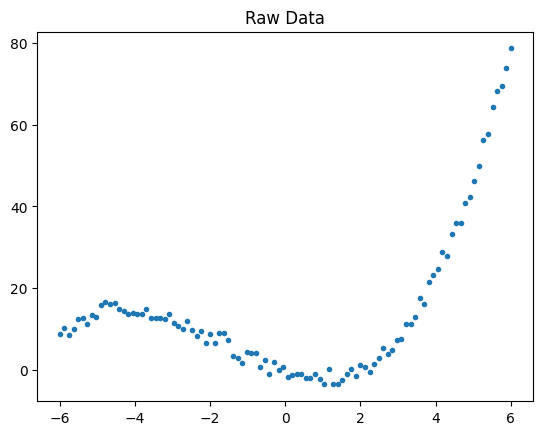

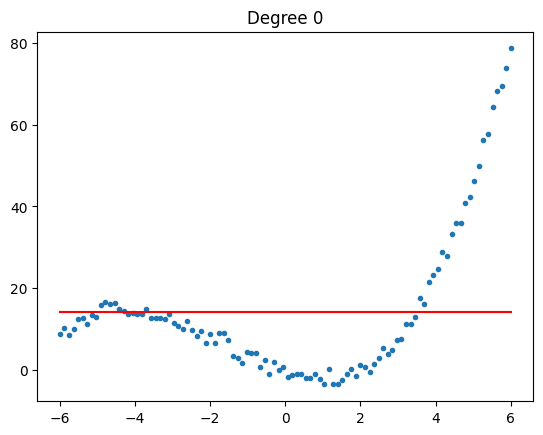

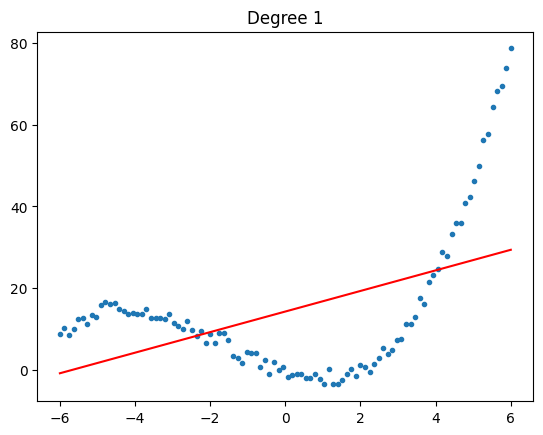

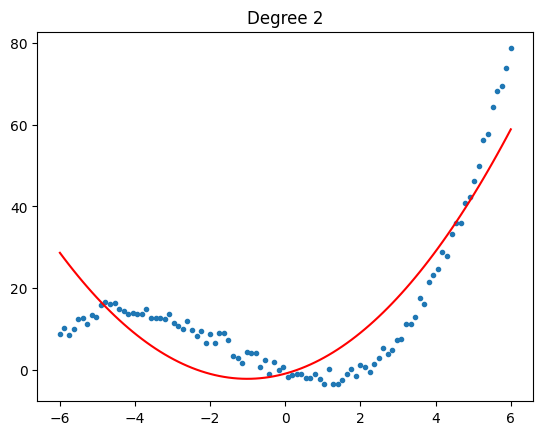

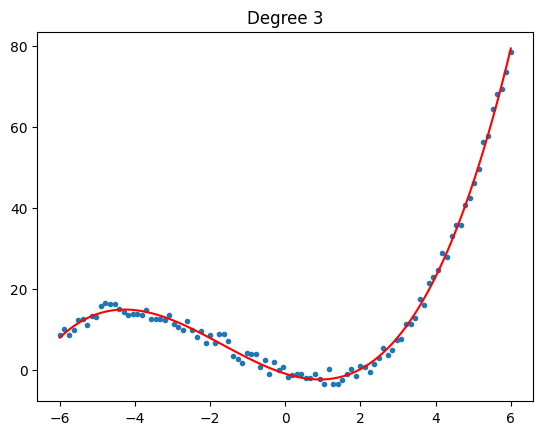

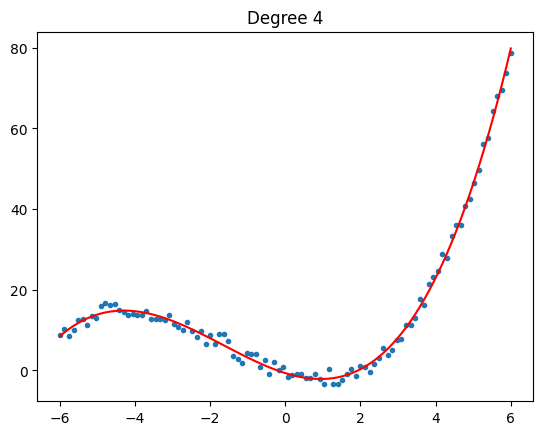

In [46]:
## data generation
x = np.linspace(-6,6,100)

def data_transform(X,degree):
    list = []
    n = range(degree)
    temp = [1]*len(X)
    list.append(temp)
    for i in n:
        temp = np.power(X,i+1)
        list.append(temp)
    X_new = np.array(list)
    return X_new

w = [-3,-3,1.25,0.25]
X=data_transform(x,3)

y=X.T @ w
y=y+5*np.random.uniform(0,1,y.shape)
plt.plot(x.T,y,'.')
plt.title("Raw Data")
plt.show()
reg=regression()

# alldegree  polynomial fitting
n = range(5)
for degree in n:
    X_1=data_transform(x,degree)
    w_mat=reg.mat_inv(y,X_1)
    y_pred=X_1.T @ w_mat
    plt.title("Degree %i" %degree)
    plt.plot(x.T,y,'.')
    plt.plot(x.T,y_pred, color ='red')
    plt.show()

# 6: Practical example (salary prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Perform using matrix inversion and using Gradiant descent  method
4. find the mean square error in test. (as performance measure)

In [53]:
import numpy as np
import pandas as pd

# Reading the data from the CSV file
dt = pd.read_csv("/content/gdrive/My Drive/salary_pred_data1.csv")
data = dt.to_numpy()

# Splitting the data into test and train sets
test = 100
train = 900

# Train set
data_train = data[0:900,:]
y_train = data_train[:,[5]]  # Target variable in the train set
x_train = data_train[:,[0,1,2,3,4]]  # Features in the train set
x_train = x_train.T  # Transposing x_train for later use

# Using Inverse Matrix Method for prediction
w_pred_1 = reg.mat_inv(y_train, x_train)  # Computing weights using the inverse matrix method
y_pred = x_train.T @ w_mat  # Predicting y using the computed weights

# Using Gradient Descent Method for prediction
lr = 0.00001  # Learning rate for gradient descent
w_pred_2, err = reg.Regression_grad_des(x_train, y_train, lr)  # Computing weights using gradient descent

# Test set
data_test = data[900:1000,:]
y_test = data_test[:,[5]]  # Target variable in the test set
x_test = data_test[:,[0,1,2,3,4]]  # Features in the test set
x_test = x_test.T  # Transposing x_test for later use

# Calculating normalized testing error for both methods
error1 = reg.error(w_pred_1, y_test, x_test) / ((np.max(y_test) - np.mean(y_test))**2)  # Error for Inverse Matrix Method
error2 = reg.error(w_pred_2, y_test, x_test) / ((np.max(y_test) - np.mean(y_test))**2)  # Error for Gradient Descent Method

# Displaying results
#Inverse Matrix
print(w_pred_1,"\n")  # Printing weights obtained from the inverse matrix method
print('Inverse Matrix: Normalized testing error=', error1, '\n')  # Printing normalized testing error for inverse matrix method

#Gradient Descent
print(w_pred_2,"\n")
print('Gradient Descent: Normalized testing error=', error1, '\n')  # Printing normalized testing error for inverse Gradient Descent

[[3071.5922551 ]
 [ 315.93633211]
 [ 210.30625394]
 [1928.62027317]
 [5483.77495713]] 

Inverse Matrix: Normalized testing error= 0.07754253856795972 

[[3071.49192647]
 [ 315.93620511]
 [ 210.30731085]
 [1928.70711076]
 [5483.774039  ]] 

Gradient Descent: Normalized testing error= 0.07754253856795972 

